### Final Model Comparison - Bank Customer Churn Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

lr_results = pd.read_csv('data/processed/logistic_regression_results.csv')
rf_results = pd.read_csv('data/processed/random_forest_results.csv')
knn_results = pd.read_csv('data/processed/knn_results.csv')
svm_results = pd.read_csv('data/processed/svm_results.csv')

print(f"  - Logistic Regression: {len(lr_results)} predictions")
print(f"  - Random Forest: {len(rf_results)} predictions")
print(f"  - KNN: {len(knn_results)} predictions")
print(f"  - SVM: {len(svm_results)} predictions")

assert all(lr_results['y_test'] == rf_results['y_test'])
assert all(lr_results['y_test'] == knn_results['y_test'])
assert all(lr_results['y_test'] == svm_results['y_test'])

  - Logistic Regression: 2000 predictions
  - Random Forest: 2000 predictions
  - KNN: 2000 predictions
  - SVM: 2000 predictions


### Calculate metrics for all models

In [2]:
# Calculate metrics for each model
models_data = {
    'Logistic Regression': lr_results,
    'Random Forest': rf_results,
    'KNN': knn_results,
    'SVM': svm_results
}

results_summary = []

for model_name, data in models_data.items():
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(data['y_test'], data['y_pred']),
        'Precision': precision_score(data['y_test'], data['y_pred']),
        'Recall': recall_score(data['y_test'], data['y_pred']),
        'F1-Score': f1_score(data['y_test'], data['y_pred']),
        'ROC-AUC': roc_auc_score(data['y_test'], data['y_proba'])
    }
    results_summary.append(metrics)

# Create comparison DataFrame
comparison_df = pd.DataFrame(results_summary)
comparison_df = comparison_df.round(4)

print("\n", comparison_df.to_string(index=False))

# Find best model for each metric
print("Best Models per Metric:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"{metric:12s}: {best_model:20s} ({best_score:.4f})")



               Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.7185     0.3929  0.7027    0.5040   0.7744
      Random Forest    0.8260     0.5577  0.7002    0.6209   0.8617
                KNN    0.7315     0.4044  0.6757    0.5060   0.7921
                SVM    0.7980     0.5025  0.7543    0.6031   0.8572
Best Models per Metric:
Accuracy    : Random Forest        (0.8260)
Precision   : Random Forest        (0.5577)
Recall      : SVM                  (0.7543)
F1-Score    : Random Forest        (0.6209)
ROC-AUC     : Random Forest        (0.8617)


### Metrics Comparison Visualization

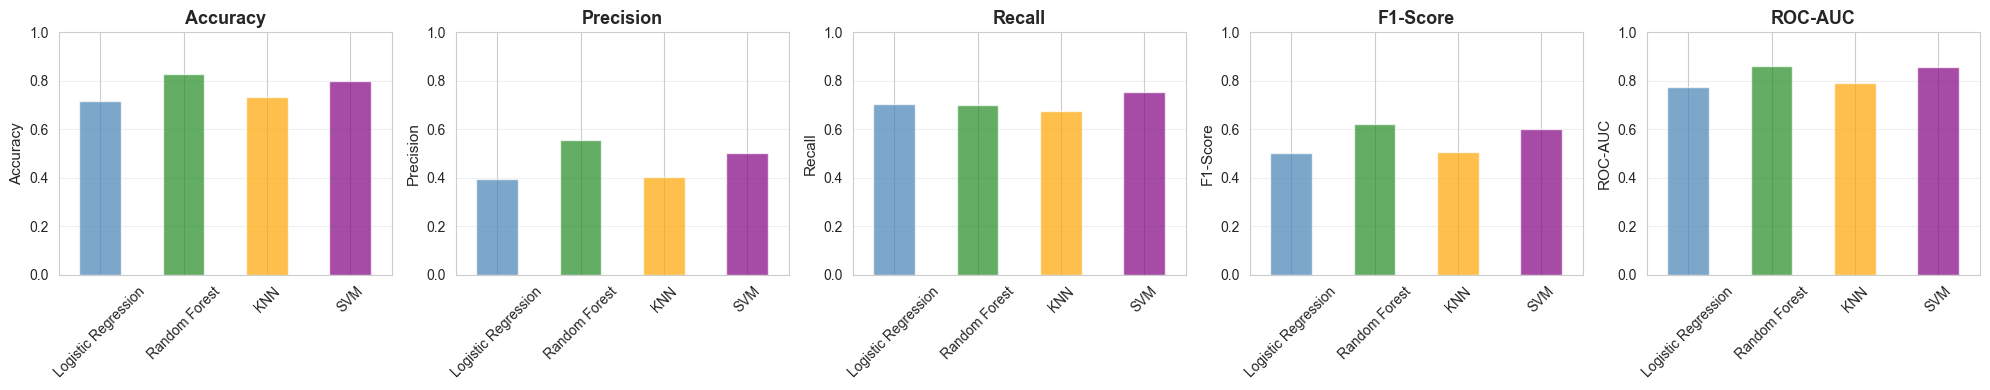

In [11]:
# Create bar plots for all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

colors = ['steelblue', 'forestgreen', 'orange', 'purple']

for idx, metric in enumerate(metrics):
    comparison_df.plot(x='Model', y=metric, kind='bar', ax=axes[idx], 
                      color=colors, legend=False, alpha=0.7)
    axes[idx].set_title(metric, fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(metric, fontsize=11)
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Best Overall Model: **Random Forest**
 
 **Performance Metrics:**
 - **ROC-AUC: 0.8617** (highest - best discriminative ability)
 - **Accuracy: 0.8260** (correctly classifies 82.6% of customers)
 - **F1-Score: 0.6209** (best balance between precision and recall)
 - **Improvement over baseline: +11.27%**
 
 **Why Random Forest wins:**
 - Captures non-linear relationships (age, balance interactions)
 - Robust to outliers and noise
 - Ensemble of 100 trees reduces overfitting
 - Handles feature interactions automatically

### ROC-CURVES Comparison

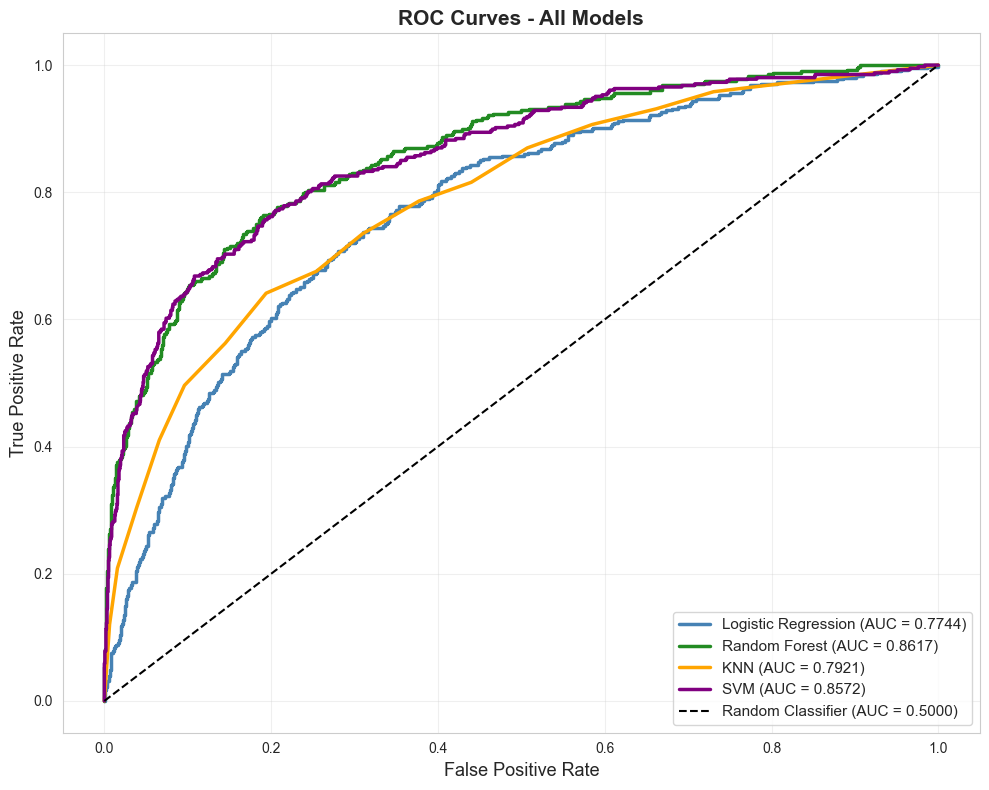


ROC-AUC Scores:
  • Logistic Regression : 0.7744
  • Random Forest       : 0.8617
  • KNN                 : 0.7921
  • SVM                 : 0.8572


In [12]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
colors_roc = ['steelblue', 'forestgreen', 'orange', 'purple']
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']

for (model_name, data), color in zip(models_data.items(), colors_roc):
    fpr, tpr, _ = roc_curve(data['y_test'], data['y_proba'])
    auc = roc_auc_score(data['y_test'], data['y_proba'])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})', 
             linewidth=2.5, color=color)

# Random classifier baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)', 
         linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('ROC Curves - All Models', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC-AUC Scores:")
for model_name, data in models_data.items():
    auc = roc_auc_score(data['y_test'], data['y_proba'])
    print(f"  • {model_name:20s}: {auc:.4f}")


**ROC Curve Analysis**
 
 **What the curves show:**
 - **Random Forest & SVM:** Very close performance (curves overlap)
 - **KNN & Logistic Regression:** Good, but noticeably worse
 - **All models:** Significantly better than random (diagonal line)
 
 **Area Under Curve (AUC) interpretation:**
 - **0.8617 (RF):** 86.17% chance model ranks random churner > random non-churner
 - **0.7744 (LR):** 77.44% chance (baseline)
 - **Improvement:** RF gives +8.73 percentage points better discrimination

### Confusion Matrices Comparison

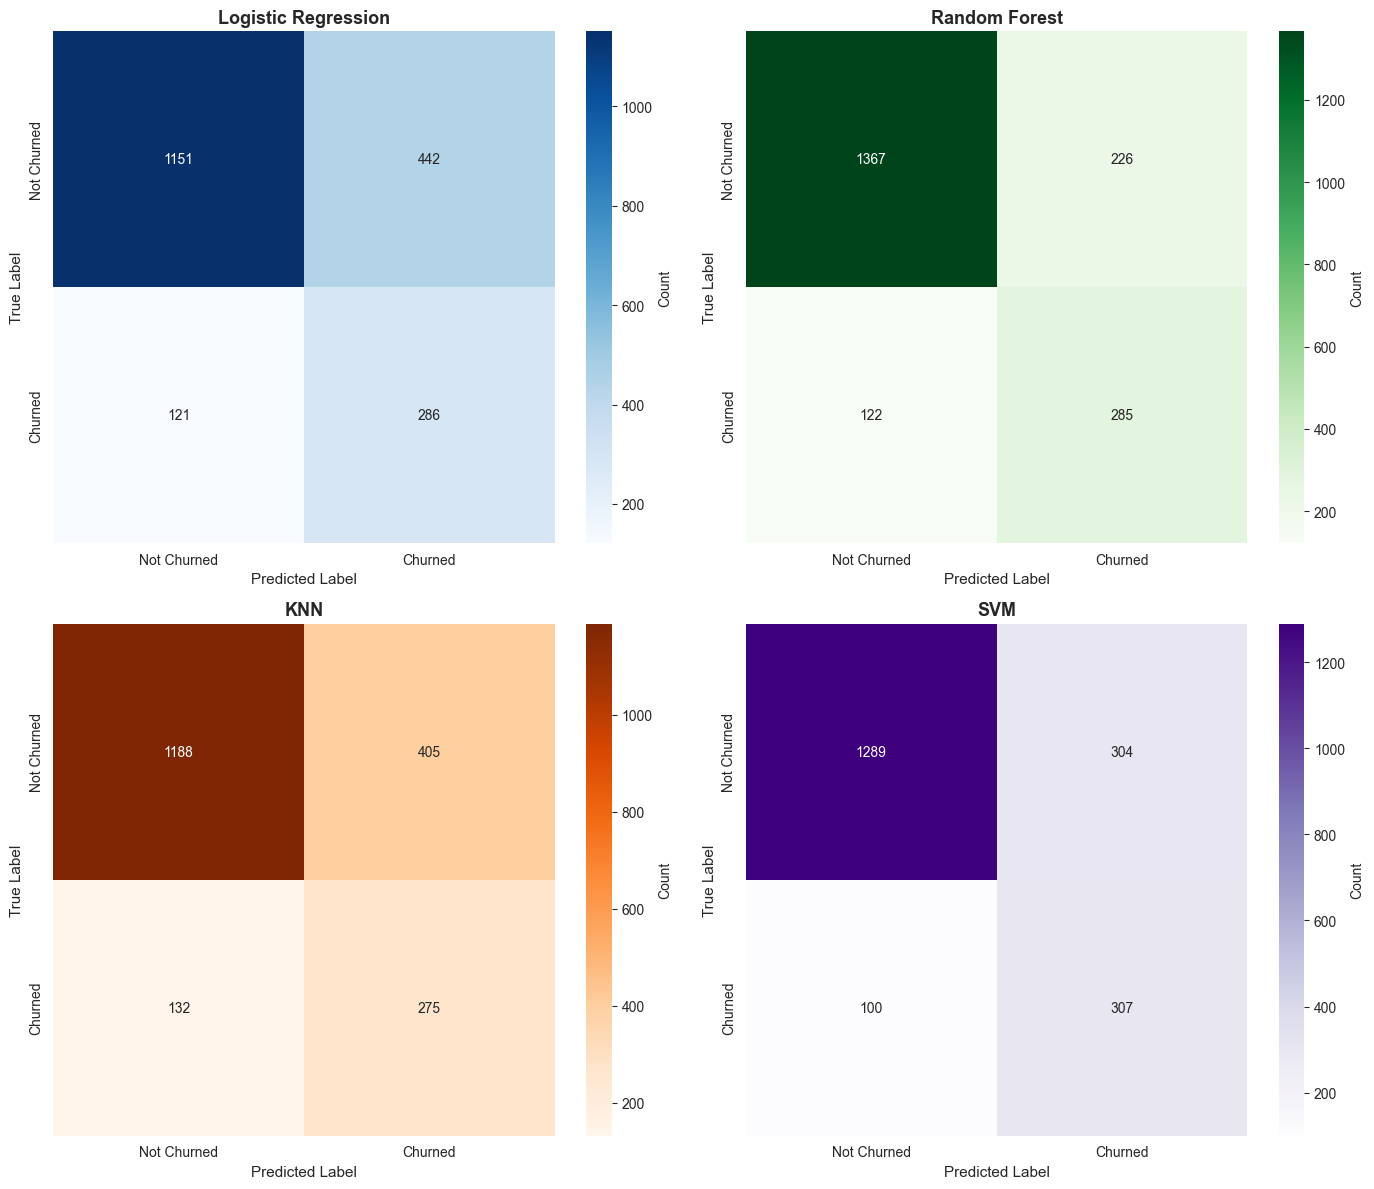


Confusion Matrix Breakdown:

Logistic Regression:
  TN: 1151  |  FP:  442
  FN:  121  |  TP:  286

Random Forest:
  TN: 1367  |  FP:  226
  FN:  122  |  TP:  285

KNN:
  TN: 1188  |  FP:  405
  FN:  132  |  TP:  275

SVM:
  TN: 1289  |  FP:  304
  FN:  100  |  TP:  307


In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']

for idx, ((model_name, data), cmap) in enumerate(zip(models_data.items(), cmaps)):
    cm = confusion_matrix(data['y_test'], data['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[idx],
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'],
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(model_name, fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
print("\nConfusion Matrix Breakdown:")
for model_name, data in models_data.items():
    cm = confusion_matrix(data['y_test'], data['y_pred'])
    print(f"\n{model_name}:")
    print(f"  TN: {cm[0,0]:4d}  |  FP: {cm[0,1]:4d}")
    print(f"  FN: {cm[1,0]:4d}  |  TP: {cm[1,1]:4d}")

**Confusion Matrix Insights**
 
 **Random Forest (Best Model):**
 - True Negatives:  1367 (correctly predicted "not churn")
 - False Positives:  226 (predicted churn, but stayed)
 - False Negatives:  122 (missed churners - COSTLY!)
 - True Positives:   285 (correctly caught churners)
 
 **Business Impact:**
 - **1367 customers:** No action needed (correctly stable)
 - **226 customers:** Get retention offer (low cost)
 - **285 customers:** Successfully prevented churn (high value!)
 - **122 customers:** Lost (need to minimize this)
 
 **SVM (Best Recall):**
 - Catches **307 churners** (vs RF's 285)
 - But has **304 false positives** (vs RF's 226)
 - Trade-off: More churners caught, but more unnecessary campaigns

### Prediction Agreement Analysis

In [14]:
# Check how often models agree on predictions
predictions = pd.DataFrame({
    'LR': lr_results['y_pred'],
    'RF': rf_results['y_pred'],
    'KNN': knn_results['y_pred'],
    'SVM': svm_results['y_pred'],
    'True': lr_results['y_test']
})

# Calculate agreement
predictions['All_Agree'] = (
    (predictions['LR'] == predictions['RF']) & 
    (predictions['RF'] == predictions['KNN']) & 
    (predictions['KNN'] == predictions['SVM'])
)

agreement_rate = predictions['All_Agree'].mean() * 100
print(f"\nAll models agree: {agreement_rate:.2f}% of predictions")

# When all agree, what's the accuracy?
all_agree_subset = predictions[predictions['All_Agree']]
if len(all_agree_subset) > 0:
    agreed_correct = (all_agree_subset['LR'] == all_agree_subset['True']).mean() * 100
    print(f"When all agree, accuracy: {agreed_correct:.2f}%")

# Disagreement analysis
disagree_subset = predictions[~predictions['All_Agree']]
print(f"\nModels disagree: {len(disagree_subset)} cases ({len(disagree_subset)/len(predictions)*100:.2f}%)")


All models agree: 64.55% of predictions
When all agree, accuracy: 87.68%

Models disagree: 709 cases (35.45%)


### Final Summary

Random Forest is the best all-rounder (highest F1 and ROC-AUC). However, if the bank prioritizes maximum coverage of at-risk customers, the SVM model's high Recall (0.75) makes it a strong candidate for a proactive retention campaign

In [15]:
# Find best overall model (based on ROC-AUC)
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_roc_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

print(f"\n Best Model: {best_model}")
print(f"   ROC-AUC: {best_roc_auc:.4f}")

print("Final Comparison Table")
print("\n", comparison_df.to_string(index=False))

print("Key Insights")

# Calculate improvements over baseline (Logistic Regression)
lr_roc = comparison_df.loc[comparison_df['Model'] == 'Logistic Regression', 'ROC-AUC'].values[0]

print(f"\nBaseline (Logistic Regression) ROC-AUC: {lr_roc:.4f}")
print("\nImprovements over baseline:")
for _, row in comparison_df.iterrows():
    if row['Model'] != 'Logistic Regression':
        improvement = (row['ROC-AUC'] - lr_roc) / lr_roc * 100
        symbol = "↑" if improvement > 0 else "↓"
        print(f"  • {row['Model']:20s}: {symbol} {abs(improvement):.2f}%")


 Best Model: Random Forest
   ROC-AUC: 0.8617
Final Comparison Table

               Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.7185     0.3929  0.7027    0.5040   0.7744
      Random Forest    0.8260     0.5577  0.7002    0.6209   0.8617
                KNN    0.7315     0.4044  0.6757    0.5060   0.7921
                SVM    0.7980     0.5025  0.7543    0.6031   0.8572
Key Insights

Baseline (Logistic Regression) ROC-AUC: 0.7744

Improvements over baseline:
  • Random Forest       : ↑ 11.27%
  • KNN                 : ↑ 2.29%
  • SVM                 : ↑ 10.69%


**Business Recommendations**
**Primary Choice: Random Forest**
 - Best overall performance (ROC-AUC: 0.8617)
 - Balanced precision/recall trade-off
 - Stable and robust predictions
 - Feature importance for business insights

**Alternative Strategies:**
 
 **1. High-Risk Tolerance (maximize churner detection):**
 - Use **SVM** (Recall: 0.7543)
 - Accepts more false positives
 - Good when retention campaigns are cheap
 
 **2. Low-Risk Tolerance (minimize false alarms):**
 - Use **Random Forest** with higher threshold
 - Reduces false positives
 - Only target high-confidence churners
 
 **3. Ensemble Approach (best of both worlds):**
 - Combine RF + SVM predictions
 - If either predicts churn → flag for review
 - Human decision on borderline cases